# Planning observations with `astroplan`

In [1]:
import numpy as np

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord

from astroplan import Observer, FixedTarget

## Time and Dates
- ### All dates and times in are UTC: *Coordinated Universal Time* 
- All `Time` calculation assume that the time is UTC
- UTC is related to  Greenwich Mean Time (GMT) but does not change with a change of seasons.

In [2]:
date1 = Time("2016-02-14 00:00:00", format='iso')

print(date1)

2016-02-14 00:00:00.000


### Current UTC Time

In [3]:
now = Time("2016-02-14 00:00:00", format='iso')   # Current UTC Time

print(now)

2016-02-14 00:00:00.000


### Different Date Formats

In [4]:
print(now.jd)               # Julian Date

print(now.mjd)              # Modified Julian Date

print(now.unix)             # Seconds since the unix epoch (Jan 01, 1970 00:00:00 UTC)

print(now.decimalyear)      # Fraction of the year (very useful for plotting)

2457432.5
57432.0
1455408000.0
2016.120218579235


### Math with Time and Dates

The most common unints in working with dates and times are: u.s (seconds), u.min (minutes), u.h (hours), u.d (days), and u.yr (years)

### Converting to local time - Need to know your offset from UTC

In [5]:
# Seattle Time (PST) = UTC - 8 hours

offset = -8 * u.h

print("The current local time is {0} local time".format(now + offset))

The current local time is 2016-02-13 16:00:00.000 local time


In [6]:
print("In 1 hour and 25 minutes it will be {0} UTC".format(now + 1*u.h + 25*u.min))

In 1 hour and 25 minutes it will be 2016-02-14 01:25:00.000 UTC


In [7]:
Christmas = Time("2016-12-25 00:00:00", format='iso')

dt = Christmas - now

print(dt.to(u.d))   # difference in days

print(dt.to(u.s))  #difference in seconds

315.0 d
27216000.0 s


---

### [Accurate Time](http://bmmorris.blogspot.com/2015/06/ut1-utc-and-astropy.html) - `UT1`

`AstroPy` calculates the times of events to a very high accuracy. To do this, is has to account for the fact that  Earth's rotation period is constantly changing due to tidal forces and changes in the Earth's moment of inertia.

To do this, `AstroPy` uses a time convention called `UT1`. This system is tied to the rotation of the Earth with repect to the positions of distant quasars. Since the Earth's rotation is constantly changing, the time system `UT1` is constanly changing with repect to `UTC`. 

The orientation of the Earth, which must be measured continuously to keep `UT1` accurate. This measurement is logged by the International Earth Rotation and Reference Systems Service (IERS). They update a "bulletin" with the most recent measurements of the Earth's orientation. This bulletin is constantly being updated.

You will run into occasions when you will get a warning that your dates are out of range of the IERS bulletin. To update the bulletin, run the follow block of code:

---

In [8]:
from astroplan import download_IERS_A

download_IERS_A()

## Setting your location - `Observer`

In [9]:
astrolab = Observer(longitude = -122.3115 * u.deg,
                    latitude = 47.65371 * u.deg,
                    elevation = 63.4 * u.m,
                    name = "Astrolab"
                    )

### Information at your location

In [10]:
sunset_here = astrolab.sun_set_time(now, which='nearest') #which sunrise or sunset
sunrise_here = astrolab.sun_rise_time(now, which='next')
midnight_here = astrolab.midnight(now, which='next')

print("Sunset will be at {0.iso} UTC".format(sunset_here))
print("Local Midnight will be at {0.iso} UTC".format(midnight_here))
print("Sunrise will be at {0.iso} UTC".format(sunrise_here))

Sunset will be at 2016-02-14 01:28:59.123 UTC
Local Midnight will be at 2016-02-14 08:27:07.090 UTC
Sunrise will be at 2016-02-14 15:24:41.201 UTC


In [11]:
print("Sunset will be at {0.iso} local time".format(sunset_here + offset))
print("Local Midnight will be at {0.iso} local time".format(midnight_here + offset))
print("Sunrise will be at {0.iso} local time".format(sunrise_here + offset))

Sunset will be at 2016-02-13 17:28:59.123 local time
Local Midnight will be at 2016-02-14 00:27:07.090 local time
Sunrise will be at 2016-02-14 07:24:41.201 local time


#### The Manastash Ridge Observatory (MRO) is operated by the Astronomy Department of the University of Washington for the training of graduate and undergraduate students as well as for astronomical research.

In [12]:
mro = Observer.at_site('mro')

sunset_mro = mro.sun_set_time(now, which='nearest')

print("Sunset at MRO will be at {0.iso} local time".format(sunset_mro + offset))

Sunset at MRO will be at 2016-02-13 17:24:05.239 local time


In [13]:
(sunset_here - sunset_mro).to(u.min)

<Quantity 4.89806167781353 min>

In [14]:
midnight_mro = mro.midnight(now, which='next')

astrolab.local_sidereal_time(midnight_mro)

<Longitude 9.779223341224329 hourangle>

In [15]:
# Astronomical twilight is when the Sun is 18 degrees below the horizon

astro_set = mro.twilight_evening_astronomical(now, which='nearest')  
astro_rise = mro.twilight_morning_astronomical(now, which='next')

print("Astronomical Evening Twilight starts at {0.iso} UTC".format(astro_set))
print("Astronomical Midnight is at {0.iso} UTC".format(midnight_mro))
print("Astronomical Morning Twilight starts at {0.iso} UTC".format(astro_rise))

Astronomical Evening Twilight starts at 2016-02-14 03:11:38.537 UTC
Astronomical Midnight is at 2016-02-14 08:20:47.468 UTC
Astronomical Morning Twilight starts at 2016-02-14 13:29:41.377 UTC


In [16]:
# Local Times

print("Astronomical Evening Twilight starts at {0.iso} local time".format(astro_set + offset))
print("Astronomical Midnight is at {0.iso} local time".format(midnight_mro - 8*u.h))
print("Astronomical Morning Twilight starts at {0.iso} local time".format(astro_rise + offset))

Astronomical Evening Twilight starts at 2016-02-13 19:11:38.537 local time
Astronomical Midnight is at 2016-02-14 00:20:47.468 local time
Astronomical Morning Twilight starts at 2016-02-14 05:29:41.377 local time


## Objects in the sky - `FixedTarget`

### You can define targets by [coordinates](./Astro_Coordinates.pdf)

In [17]:
coords = SkyCoord('02h19m00.0s', '+57d07m042s', frame='icrs') #icrs - international celestial reference system
ngc869 = FixedTarget(name='NGC869', coord=coords) #fixedtarget - dont move wrt background stars

In [18]:
ngc869.ra

<Longitude 34.74999999999999 deg>

In [19]:
ngc869.ra.hms

hms_tuple(h=2.0, m=18.0, s=59.999999999999147)

In [20]:
astrolab.target_is_up(midnight_here, ngc869) #(when, obj)

True

In [21]:
# Altitude and Azimuth of a target at a specific time

aa = astrolab.altaz(midnight_here, ngc869)

aa.alt.degree, aa.az.degree

(28.510540494814432, 325.5008249712631)

In [22]:
# You can get the galactice coords of the target

aa.galactic

<SkyCoord (Galactic): (l, b) in deg
    (134.63216119, -3.74091212)>

In [23]:
# You can get the coords at a different epoch (1950)

aa.fk4

<SkyCoord (FK4: equinox=B1950.000, obstime=2457432.8521653963): (ra, dec) in deg
    (33.86767216, 56.89850062)>

### Most targets can be defined by name

In [24]:
Obj1 = FixedTarget.from_name("m1")

In [25]:
Obj1.coord 

<SkyCoord (ICRS): (ra, dec) in deg
    (83.633083, 22.0145)>

In [26]:
Obj1.ra.hms

hms_tuple(h=5.0, m=34.0, s=31.939920000004918)

### Planning - Observing at MRO

#### [Air Mass](https://en.wikipedia.org/wiki/Air_mass_%28astronomy%29) is the optical path length through Earth’s atmosphere. At sea-level, the air mass at the zenith is 1. Air mass increases as you move toward the horizon, reaching a value of approximately 38 at the horizon.

- #### The best time to observe a target is at minimum airmass.
- #### When the airmass of your target is getting close to 2, you should be observing another target.

In [27]:
mro.target_is_up(midnight_mro, Obj1)

True

Object is up at midnight at MRO - good

In [28]:
altaz_Obj1 = astrolab.altaz(midnight_mro, Obj1)

altaz_Obj1.alt, altaz_Obj1.az

(<Latitude 34.22715902084896 deg>, <Longitude 265.8031964633017 deg>)

Nice high altitude - looking good

In [29]:
# You can find the airmass by using the .secz method

altaz_Obj1.secz

<Quantity 1.7778556470995026>

Airmass < 2, you are good to go.

## Planning observation is easier with plots

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

from astroplan.plots import plot_sky, plot_airmass

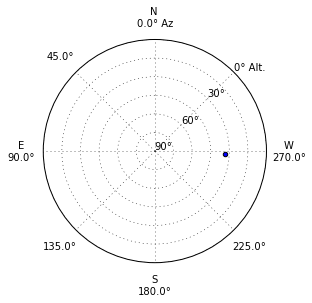

In [31]:
plot_sky(Obj1, mro, midnight_mro);

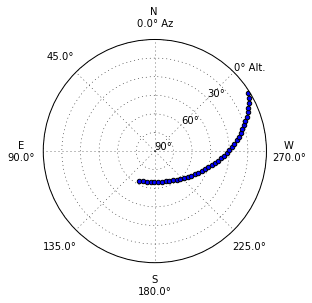

In [49]:
start_time = astro_set
end_time = astro_rise
delta_t = end_time - start_time
observe_time = start_time + delta_t * np.linspace(0.0, 1.0, 50)

# np.linspace(0, 1, 50) make 50 evenly spaced points from 0.0 to 1.0

plot_sky(Obj1, mro, observe_time);


### Plot the airmass of the target over the night

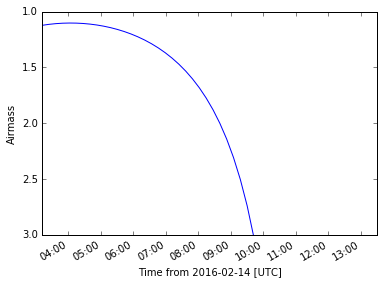

In [33]:
plot_airmass(Obj1, mro, observe_time);

M31 is good target for observation at MRO for most of the night

### Not all targets can be observed at all locations

In [34]:
Obj2 = FixedTarget.from_name("Wezen")

In [35]:
mro.target_is_up(midnight_mro, Obj2)

True

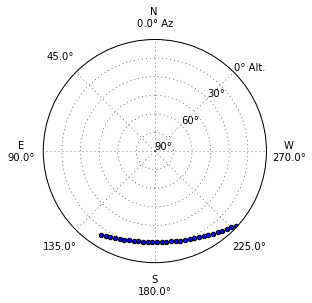

In [36]:
plot_sky(Obj2, mro, observe_time);

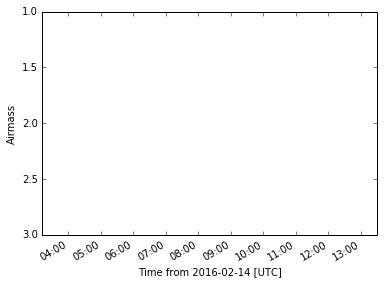

In [37]:
plot_airmass(Obj2, mro, observe_time);

Not looking good

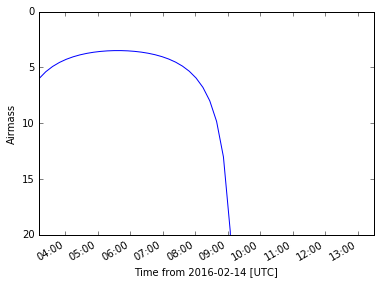

In [38]:
# astroplan sets the default limits of the airmass plot to [3,0].
# If you want to see a target at a higher airmass you have to set the limits yourself.

fig,ax = plt.subplots(1,1)

plot_airmass(Obj2, mro, observe_time)
ax.set_ylim([20,0]);

As you can see, MRO is not the best place to observe Object 2.

### Finder Charts

In [39]:
from astroplan.plots.finder import plot_finder_image
from astroquery.skyview import SkyView

ImportError: No module named 'astroquery'

In [ ]:
plot_finder_image(ngc869)

In [ ]:
# plot_finder_image defaults to a field of view of 10 u*arcmin
# You can specify a different fov

plot_finder_image(ngc869, fov_radius= 1.3 * u.degree)

In [ ]:
plot_finder_image(Obj1, fov_radius= 7 * u.arcmin)